# 实习僧数据处理及分析报告 - 数据处理篇

## 项目背景及介绍

### 前言

首先要感谢一下Alfred1984前辈在github开源项目及代码，作为一个业余的数据分析爱好者能够获取这些学习和实践的资料，万分感谢。本报告首先对Alfred1984前辈的代码及分析思路进行了深度理解。在此基础上，对部分内容进行了调整和修改，添加了自己的思路及一些处理方式。

### 需求及分析目的

**<table><font color = blue>需求:</font></table>**   

帮助某位想要求职“数据挖掘”、“机器学习”、“算法”的同学对实习僧网站上的相关岗位进行分析，根据该同学的情况选取最符合的岗位。

**<table><font color = blue>同学信息:</font></table>**
* 深圳人
* 硕士在读
* 只能实习3个月
* 薪资高于深圳平均实习薪资
* 要求是最新发布的职位

**<table><font color = blue>源数据:</font></table>**  

Alfred1984前辈爬取了当时实习僧网站上“数据挖掘”、“机器学习”、“算法”三个关键字下的近1000条岗位数据。本分析报告基于该部分数据进行分析和学习。

## 数据处理阶段

### 准备阶段

<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">用python处理和分析数据的基础当然是Numpy、Pandas、matplotlib这些相关包啦，所有第一步当然是导包啦。</font></td></table>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                           #数据可视化包
import pyecharts                                #数据可视化包
import missingno as msno                        #可视化查看丢失数据
plt.style.use('ggplot')                         #数据可视化包
plt.rcParams['font.sans-serif']=['SimHei']      #解决matplotlib无法显示中文的问题
plt.rcParams['axes.unicode_minus'] = False
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']    #解决seaborn中文字体显示问题
plt.rc('figure', figsize = (20,20))             #把plt默认的图片size调大一点
%matplotlib inline

<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">倒入数据，三个关键字的数据分别存储在了三个csv文件中</font></td></table>

In [3]:
data_dm = pd.read_csv('datamining.csv')
data_ml = pd.read_csv('machinelearning.csv')
data_al = pd.read_csv('mlalgorithm.csv')
data = pd.concat([data_dm, data_ml, data_al], ignore_index = True)      #把三个data文件合并起来并且重新set索

<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">通常来讲，数据倒入后，我都会先对原始数据进行多方位的查看一波，好好了解一下数据。</font></td></table>

In [4]:
data.sample(3) #随机查看3行数据

,auth_capital,city,com_class,com_fullname,com_id,com_intro,com_links,com_location,com_logo,com_name,...,job_deadline,job_detail,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
870,注册资本：100 万元 人民币,北京,公司类型：有限责任公司(自然人独资),北京数美科技有限公司,注册号：110108018799996,创新型互联网高科技公司,https://www.shixiseng.com/com/com_r0gy3z2pveej,蓟门壹号,https://sxsimg.xiaoyuanzhao.com/84/2A/84595DB9...,保数通,...,2018-03-31,NaN,https://www.shixiseng.com/intern/inn_mmqbheaw1qrr,数据处理实习生,少于15人,2周前,算法,13个月,2018-03-06 08:16:22,200-300/天
491,注册资本：100万人民币,上海,公司类型：有限责任公司（自然人独资）,上海点陌网络科技有限公司,统一社会信用代码：91310117MA1J2F5BXT,虚拟货币行业的互联网创业公司,https://www.shixiseng.com/com/com_jx6di4tmudut,上海市虹梅路2071号2号楼3楼weplus众创空间318、319,https://sxsimg.xiaoyuanzhao.com/E9/B8/E98E7A40...,点陌科技,...,2018-05-01,['职责：理解炒币专业人士的思路后，配合程序员，开发自动搬砖程序，套利程序，高频交易程序。'...,https://www.shixiseng.com/intern/inn_hqnrpmvwt0sg,数学建模实习生,15-50人,27小时前,算法,6个月,2018-03-21 12:27:58,250-500/天
683,注册资本：5000万人民币,上海,公司类型：有限责任公司（自然人投资或控股）,上海七牛信息技术有限公司,组织机构代码：58058395-0,专注为“互联网+”企业与创业者提供数据从管理到大数据分析的一站式服务。,https://www.shixiseng.com/com/com_xlkt9vljeqjt,上海市浦东新区金科路2889弄长泰国际广场A座10层,https://sxsimg.xiaoyuanzhao.com/3B/A7/3B5B3EA0...,七牛云,...,2018-09-30,"['工作职责：', '1、 参加算法团队的数据定义、分布分析、数据采集和数据标注的发布和质量...",https://www.shixiseng.com/intern/inn_nyfnexeeinfi,算法工程师实习（智能数据方向）,500-2000人,3天前,软件,6个月,2018-03-19 10:15:35,200-300/天



**<table><font color = #ABB2B9>从上面的查询结果中我们可以看出，该数据表中每条数据的字段还是非常多的，我们可以通过很多不同的纬度对此份数据进行分析，下面我们来看看每条数据到底都包括来哪些字段。</font></table>** 


In [5]:
data.loc[3] #抽取一条数据查看所有特征的数据类型

auth_capital                                          注册资本：4520万元美元
city                                                             北京
com_class                                       公司类型：有限责任公司(外国法人独资)
com_fullname                                       百度在线网络技术（北京）有限公司
com_id                                          注册号：110000410144104
com_intro                                       全球最大的中文搜索引擎、最大的中文网站
com_links            https://www.shixiseng.com/com/com_tf3pjfyfvs7c
com_location                                            北京市海淀区百度科技园
com_logo          https://sxsimg.xiaoyuanzhao.com/0A/80/0A4DB3F4...
com_name                                                         百度
com_website                                    http://www.baidu.com
com_welfare        ['团队大牛云集', '免费茶饮', '专业', '团队专业', '有文化', '福利待遇好']
day_per_week                                                   4天/周
detailed_intro    百度核心价值: 为人们提供最便捷的信息获取方式 百度狂热的追求更好的搜索技术，追求给网民带来...
est_date                                        

**<table><font color = #ABB2B9>接下来我们来看下原始数据的各字段的数据类型情况。</font></table>** 

In [8]:
data.info() #查看字段基本情况

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 27 columns):
auth_capital      906 non-null object
city              974 non-null object
com_class         954 non-null object
com_fullname      974 non-null object
com_id            906 non-null object
com_intro         974 non-null object
com_links         978 non-null object
com_location      978 non-null object
com_logo          974 non-null object
com_name          974 non-null object
com_website       865 non-null object
com_welfare       978 non-null object
day_per_week      978 non-null object
detailed_intro    912 non-null object
est_date          906 non-null object
industry          960 non-null object
job_academic      978 non-null object
job_deadline      978 non-null object
job_detail        681 non-null object
job_links         978 non-null object
job_title         978 non-null object
num_employee      972 non-null object
released_time     978 non-null object
tag               978

**<table><font color = #ABB2B9>我们可以看到原始数据的各字段都是object类型。接下来我们来看看整体的数据情况。</font></table>** 

In [9]:
data.shape #查看行列

(978, 27)

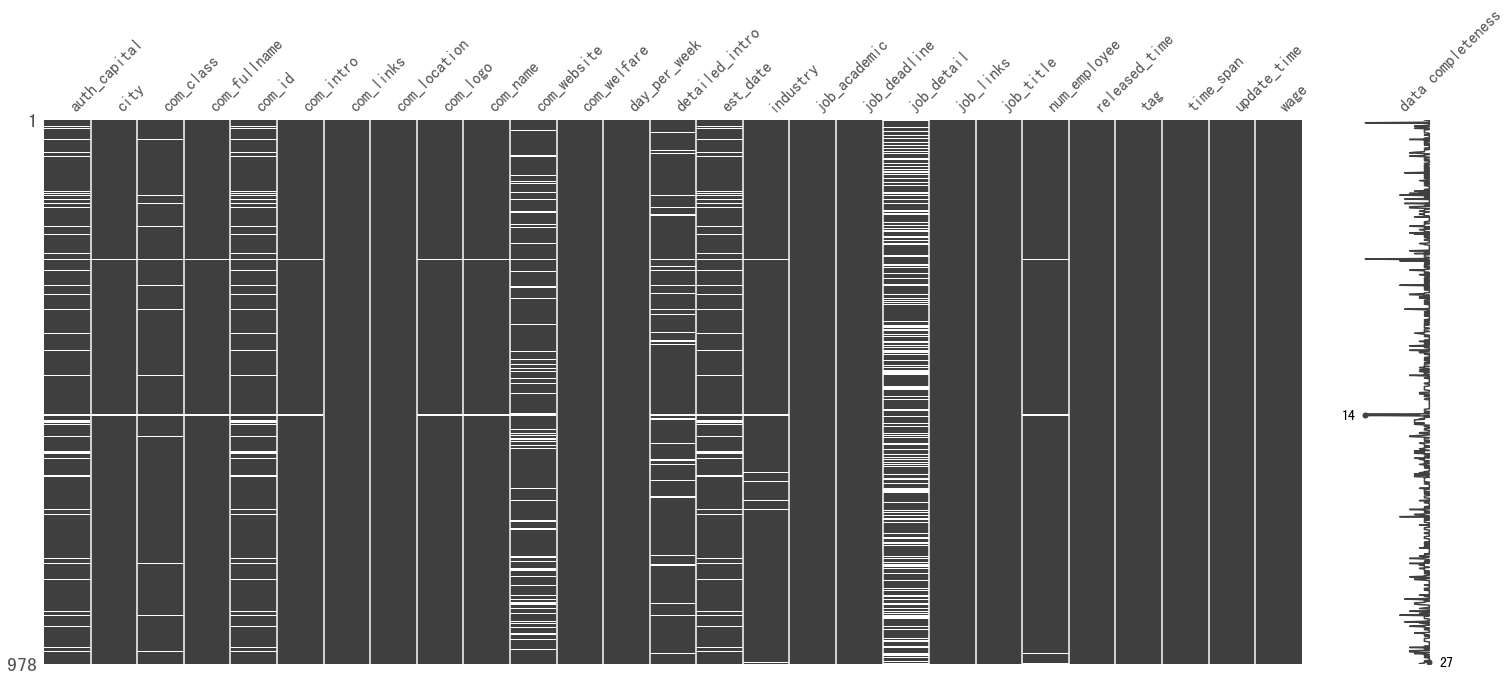

In [10]:
msno.matrix(data, labels=True) #查看下数据缺失情况

**<table><font color = #ABB2B9>这个方式的好处就是我们可以通过可视化的方式看我们数据信息缺失情况。从上图中我们可以看出,例如job_links字段数据是没有缺失情况的；相反，job_detail字段数据缺失情况就比较严重</font></table>** 

### 数据处理阶段

<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">第一步：首先我们先对数据进行整体处理，包括：去重和去除不需要的字段，处理逻辑如下：<font></td></table>
* 根据招聘链接字段 job_links 进行去重操作。
* 去除 com_id、com_links、com_location、com_website、com_welfare、detailed_intro、job_detail 字段，本次分析暂不需要这些字段，把处理后的数据存入data_clean的dataFrame


In [11]:
data.drop_duplicates(subset = 'job_links', inplace = True)  #根据招聘链接去重（(inplace=True)是直接对原dataFrame进行操作。）

In [12]:
data.shape #查看去重后的数据量

(878, 27)

In [13]:
data_clean = data.drop(['com_id','com_links','com_location','com_website','detailed_intro','job_detail'], axis =1 ) # 删除不需要的字段

<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">第二步：下面开始对data_clean中的字段逐个清洗处理，初步处理思路如下：<font></td></table>
* 要对数字相关的字段改成数值型数据，包括：auth_capital, num_empliyee, wage, day_per_week, time_span
* 要将时间的字段改成datatime类型，包括：est_date”（公司成立日期）、“job_deadline”（截止时间）、
“released_time”（发布时间）、“update_time”（更新时间）等字段

--------------------------------------------------数值型数据处理----------------------------------------------------

<table><font color=#E59866 size = 3 face="黑体">
<br>
字段：auth_capital
<br>
数据样例：‘注册资本：1300万美元’
<br>
处理思路:先把“注册资本：”清理掉，再把数值型数据提取出来，然后根据各币种的汇率，把注册资本转换为“万元人民币”单位</font></table>

In [26]:
#第一步：看下auth_capital的数据样例
data_clean['auth_capital'].sample(3)

68          注册资本：4500万
303    注册资本：5450 万元 美元
205                NaN
Name: auth_capital, dtype: object

In [18]:
#第二步：看下auth_capital的数据格式
data_clean['auth_capital'].dtypes

dtype('O')

In [19]:
#第三步：切割字符串(：分割)，去除注册资本，保留金额和单位
auth_capital = data_clean['auth_capital'].str.split('：',expand = True) #这里有2点要注意（1）expend = True代表，分拆后的各元素分别占一列 （2）'：'这里的冒号是中文格式的因为要和数据中的一致
auth_capital.sample(5)

,0,1
336,注册资本,22000万美元
920,注册资本,319.7247万元人民币
184,注册资本,1000 万元 人民币
906,注册资本,289974.8755 万元人民币
902,NaN,NaN


In [88]:
#第四步：把金额提取出来，转换成float型
auth_capital['num'] = auth_capital[1].str.extract('([0-9.]+)', expand=False).astype('float') #(1)将提取出的内容存入num字段 （2）'([0-9.]+)'为正则表达式 (3)dtype为查看数据，astype为转换数据
auth_capital.sample(5)

,0,1,num,ex_rate
507,注册资本,500万元人民币,500.00,1.0
555,注册资本,1010万元人民币,1010.00,1.0
182,注册资本,1000 万元,1000.00,NaN
215,注册资本,11.99 万元人民币,11.99,1.0
693,注册资本,203000 万元,203000.00,NaN


In [89]:
#第五步：处理币种单位
#(1) 把金额和单位以‘万’split开，查看下有哪些币种
auth_capital[1].str.split('万', expand = True)[1].unique()   #split后金额存在‘0’字段，单位存在‘1’字段，对1字段做uniqe处理，就可以看出来有哪些币种

array(['美元', '人民币', '元美元', nan, '元人民币', '人民币元', '元', None, '元 人民币', '',
       '元 美元', '元港元（港币）', '港币', '香港元', '欧元', '元 港元（港币）'], dtype=object)

**<table><font color = #ABB2B9>可以看出公司注册资本基本上都是人民币，欧元或者港币计算，下一步我们可以通过设置函数来将不同的币种转化成人民币</font></table>** 

**<table><font color = red>注意：我们可以看到这列数据种有'nan'和'None'这两个值，这两个值非常的特殊，nan是float类型（float, int 不是可遍历的类型，可遍历的常用类型有字符串(str), 列表(list), 字典(dict)，集合(set)）</font></table>** 

In [90]:
#（2）定义判断是否为nan函数
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
#（3）定义函数，计算汇率
def get_ex_rate(string):
    if string is None:        #大大坑！！！！！这个错误的罪魁祸首-》》》》》 argument of type 'NoneType' is not iterable
        return np.nan
    if isfloat(string):      #大大坑！！！！！NaN是float格式！！！这个错误的罪魁祸首-》》》》》TypeError: argument of type 'float' is not iterable
        return np.nan
    if '人民币' in string:
        return 1.00
    elif '港' in string:
        return 0.80
    elif '美元' in string:
        return 6.29
    elif '欧元' in string:
        return 7.73
    else:
        return np.nan

In [91]:
#（4）把汇率存入ex_rate字段
auth_capital['ex_rate'] = auth_capital[1].apply(get_ex_rate)

In [92]:
#（5）把金额统一为人民币
data_clean['auth_capital'] = auth_capital['num'] * auth_capital['ex_rate']

In [87]:
#（6）最后我们再来看下我们处理的数据
data_clean['auth_capital'].head()

0    235875.0000
1     27570.9972
2       314.5000
3     28430.8000
4     28430.8000
Name: auth_capital, dtype: float64

In [96]:
#(7) 金额一般都保留两位小数，我们再处理一下
data_clean['auth_capital'] = data_clean['auth_capital'].round(decimals = 2)
data_clean['auth_capital'].sample(5)

866    348466.00
660     36000.00
927       899.12
555      1010.00
140      1000.00
Name: auth_capital, dtype: float64

<table><font color = red>注意：这里我们需要注意一下，保留小数有两种方式：

* .round(decimals = 2) 这种方式转换完的数据类型为float
* .map(lambda x:("%.2f")%x) 这种方式处理完的数据类型为object
</font>
<br>
<br>
**<font color = #ABB2B9>此时，auth_capital(注册资本)字段已经处理为xxxx（万元人民币）</font></table>**


<table><font color=#E59866 size = 3 face="黑体">
<br>
字段：day_per_week
<br>
数据样例：‘3天/周’
<br>
处理思路:直接把字段中别的汉字去除，保留数字</font></table>

In [97]:
#第一步：看下day_per_week的数据样例
data_clean['day_per_week'].sample(3)

72     3天/周
970    3天/周
760    3天/周
Name: day_per_week, dtype: object

In [98]:
#第二步，看下去重后的数据
data_clean.day_per_week.unique() #查看下该字段先有哪些数据（不重复的）

array(['4天/周', '5天/周', '3天/周', '2天/周', '6天/周'], dtype=object)

In [99]:
#第三步，数据量不大，直接赋值,用loc定位数据的行，列  ----》通过标签的label的形式选取数据---loc
data_clean.loc[data['day_per_week']=='2天/周', 'day_per_week'] = 2
data_clean.loc[data['day_per_week']=='3天/周', 'day_per_week'] = 3
data_clean.loc[data['day_per_week']=='4天/周', 'day_per_week'] = 4
data_clean.loc[data['day_per_week']=='5天/周', 'day_per_week'] = 5
data_clean.loc[data['day_per_week']=='6天/周', 'day_per_week'] = 6

In [101]:
#第四步，最后我们再来看下我们处理的数据
data_clean['day_per_week'].sample(3)

136    4
65     4
241    5
Name: day_per_week, dtype: int64

<table><font color = #ABB2B9>最后看了一下type没问题，是我们要的数值类型</font><table>

<table><font color=#E59866 size = 3 face="黑体">
字段：time_span
<br>
数据样例：‘3个月’
<br>
处理思路:只保留月份数字，把‘个月’去除</font></table>

In [109]:
#第一步：看下day_per_week的数据样例
data_clean['time_span'].sample(3)

972    11个月
527     3个月
307     7个月
Name: time_span, dtype: object

In [110]:
#第二步，看下去重后的数据
data_clean.time_span.unique() #查看下该字段先有哪些数据（不重复的）

array(['3个月', '4个月', '6个月', '7个月', '5个月', '9个月', '8个月', '10个月', '12个月',
       '13个月', '18个月', '14个月', '16个月', '11个月', '15个月', '2个月', '17个月',
       '1个月'], dtype=object)

In [112]:
#第二步，处理逻辑和上个字段一样，但是由于枚举过多，这次用遍历形式处理
#(构造一个字典，通过pd.Series.map() 也就是映射的方式来做，方便快捷)

#(1) 用mapping做一组键值对 ------》'xx个月'为键，xx为值
mapping = {} #建立一个空series
for i in range(1,19):        #枚举值在1-18个月
    mapping[str(i) + '个月'] = i
print(mapping)

{'1个月': 1, '2个月': 2, '3个月': 3, '4个月': 4, '5个月': 5, '6个月': 6, '7个月': 7, '8个月': 8, '9个月': 9, '10个月': 10, '11个月': 11, '12个月': 12, '13个月': 13, '14个月': 14, '15个月': 15, '16个月': 16, '17个月': 17, '18个月': 18}


In [113]:
#(2) 用map函数把键值对中的值赋到df中
data_clean['time_span'] = data['time_span'].map(mapping)

In [114]:
#第三步，最后我们再来看下我们处理的数据
data_clean['time_span'].sample(3)

500    7
781    4
929    6
Name: time_span, dtype: int64

<table><font color=#E59866 size = 3 face="黑体">
字段：wage 
<br>
数据样例：‘120-198/天’
<br>
处理思路: 把最高和最低工资抽取出来，求每个岗位的平均工资</font></table>

In [116]:
#第一步：看下day_per_week的数据样例
data_clean['wage'].sample(3)

138     80-120/天
266    200-350/天
79     150-200/天
Name: wage, dtype: object

In [120]:
#第二步，把工资区间变为取一个最低和最高工资
wage = data['wage'].str.extract('([0-9.]+)-([0-9.]+)/天', expand = True) #数据类型为object
wage.loc[1]

0    160
1    280
Name: 1, dtype: object

**<table><font color = #ABB2B9>我们可以看到数据类型是object，需要处理成数值型才能进行求平均值</font></table>**

In [124]:
#第三步，转换类型
wage = wage.astype('int')
wage.loc[1] #此时数据类型为int

0    160
1    280
Name: 1, dtype: int64

In [127]:
#第四步，求平均值
data_clean['avg_wage'] = wage.mean(axis = 1)
data_clean['avg_wage'].head()

0    200.5
1    220.0
2    140.0
3    175.0
4    175.0
Name: avg_wage, dtype: float64

**<table><font color = #ABB2B9>数值类型的字段我们就到此处理结束啦～～，让我们来看一下我们处理过后的几个字段长啥样</font></table>**

In [134]:
data_check = pd.DataFrame({'auth_capital':data_clean['auth_capital'], 'day_per_week':data_clean['day_per_week'], 'time_span':data_clean['time_span'], 'avg_wage':data_clean['avg_wage']})
data_check.head()

,auth_capital,avg_wage,day_per_week,time_span
0,235875.0,200.5,4,3
1,27571.0,220.0,5,4
2,314.5,140.0,4,4
3,28430.8,175.0,4,4
4,28430.8,175.0,4,4


--------------------------------------------------时间类型数据处理----------------------------------------------------

<table><font color=#E59866 size = 3 face="黑体">
字段：est_date
<br>
数据样例：‘成立日期：2011-04-14’
<br>
期望时间格式：xxxx-xx-xx
<br>
处理思路: 把'成立时间'去除，把格式转换成datetime</font></table>

In [136]:
#第一步：看下数据样例
data_clean['est_date'].sample(3)

123    成立日期：2016-04-07
512    成立日期：2013-01-29
715    成立日期：2011-08-03
Name: est_date, dtype: object

In [142]:
#第二步：正则提取
est_date = data['est_date'].str.extract('成立日期：([0-9-]+)', expand=False) #现在是object类型
est_date.head()

0    2004-12-07
1    1995-09-22
2    2002-10-15
3    2000-01-18
4    2000-01-18
Name: est_date, dtype: object

In [145]:
#第三步：类型转换
data_clean['est_date'] = pd.to_datetime(est_date)
data_clean['est_date'].head()

0   2004-12-07
1   1995-09-22
2   2002-10-15
3   2000-01-18
4   2000-01-18
Name: est_date, dtype: datetime64[ns]

**<table><font color = #ABB2B9>最后看一下时间格式没问题，开始进行下个处理</font></table>**

<table><font color=#E59866 size = 3 face="黑体">
字段：job_deadline
<br>
数据样例：‘2011-04-14’
<br>
期望时间格式：xxxx-xx-xx
<br>
处理思路: 直接转换格式</font></table>

In [147]:
#第一步：看下数据样例
data_clean['job_deadline'].sample(3)

311    2018-04-11
98     2018-04-02
970    2023-09-09
Name: job_deadline, dtype: object

In [151]:
#第二步：转换格式
data_clean['job_deadline'] = pd.to_datetime(data_clean['job_deadline'])
data_clean['job_deadline'].head()

0   2018-04-13
1   2020-12-31
2   2018-03-31
3   2018-04-02
4   2018-04-05
Name: job_deadline, dtype: datetime64[ns]

<table><font color=#E59866 size = 3 face="黑体">
字段：update_time
<br>
数据样例：‘2011-04-14’
<br>
期望时间格式：xxxx-xx-xx hhmmss
<br>
处理思路: 直接转换格式</font></table>

In [168]:
#第一步：看下数据样例
data_clean['update_time'].sample(3)

345    2018-03-22 15:11:23
483    2018-03-21 13:40:48
745    2018-03-15 11:07:34
Name: update_time, dtype: object

In [169]:
#第二步：转换格式
data_clean['update_time'] = pd.to_datetime(data_clean['update_time'])
data_clean['update_time'].head()

0   2018-03-21 10:48:06
1   2018-03-21 10:37:22
2   2018-03-21 10:23:45
3   2018-03-21 10:22:52
4   2018-03-21 10:18:57
Name: update_time, dtype: datetime64[ns]

**<table><font color = #ABB2B9>时间类型的字段我们就到此处理结束啦～～，让我们来看一下我们处理过后的几个字段长啥样</font></table>**

In [170]:
data_check = pd.DataFrame({'est_date':data_clean['est_date'], 'job_deadline':data_clean['job_deadline'], 'update_time':data_clean['update_time']})
data_check.head()

,est_date,job_deadline,update_time
0,2004-12-07,2018-04-13,2018-03-21 10:48:06
1,1995-09-22,2020-12-31,2018-03-21 10:37:22
2,2002-10-15,2018-03-31,2018-03-21 10:23:45
3,2000-01-18,2018-04-02,2018-03-21 10:22:52
4,2000-01-18,2018-04-05,2018-03-21 10:18:57


--------------------------------------------------字符型数据处理----------------------------------------------------

<table><font color=#E59866 size = 3 face="黑体">
字段：city
<br>
数据样例：‘成都市’
<br>
期望：'成都'
<br>
处理思路: 部分数据需要处理一下， 直接赋值处理</font></table>

In [171]:
#第一步：看下数据样例
data_clean['city'].sample(3)

597    北京
17     北京
68     广州
Name: city, dtype: object

In [172]:
#第一步：看下去重后的数据
data_clean['city'].unique()

array(['北京', '上海', '广州', nan, '南京', '深圳', '宁波', '杭州', '西安', '成都', '合肥',
       '珠海市', '其他', '重庆', '武汉', '无锡', '天津', '珠海 深圳', '长沙', '厦门', '珠海',
       '济南', '香港', '苏州', '上海漕河泾开发区', '晋江', '东莞', '成都市', '大连', '福州', '沈阳'],
      dtype=object)

In [173]:
#第二步：赋值处理
data_clean.loc[data_clean['city'] == '成都市', 'city'] = '成都'
data_clean.loc[data_clean['city'].isin(['珠海市','珠海 深圳']), 'city'] = '珠海'
data_clean.loc[data_clean['city'] == '上海漕河泾开发区','city'] = '上海'

In [174]:
#第三步：检查一下
data_clean['city'].unique()

array(['北京', '上海', '广州', nan, '南京', '深圳', '宁波', '杭州', '西安', '成都', '合肥',
       '珠海', '其他', '重庆', '武汉', '无锡', '天津', '长沙', '厦门', '济南', '香港', '苏州',
       '晋江', '东莞', '大连', '福州', '沈阳'], dtype=object)

<table><font color=#E59866 size = 3 face="黑体">
字段：com_class 公司及企业类
<br>
数据样例：‘公司类型：股份有限公司(上市)’
<br>
处理思路: 
<br>
把数据份为这些类：股份有限公司（未上市）’、‘股份有限公司（上市）’、‘有限责任公司’、‘外商投资公司’、‘有限合伙企业’、‘国有企业’</font></table>

In [177]:
#第一步：查看一下数据
data['com_class'].head()

0    公司类型：有限责任公司(台港澳法人独资)
1         公司类型：股份有限公司(上市)
2    公司类型：有限责任公司(台港澳法人独资)
3     公司类型：有限责任公司(外国法人独资)
4     公司类型：有限责任公司(外国法人独资)
Name: com_class, dtype: object

In [176]:
#第二步：查看数据的枚举值   --- 以列表形式展示
list(data['com_class'].unique())

['公司类型：有限责任公司(台港澳法人独资)',
 '公司类型：股份有限公司(上市)',
 '公司类型：有限责任公司(外国法人独资)',
 nan,
 '公司类型：有限责任公司',
 '公司类型：有限责任公司（法人独资）',
 '公司类型：其他有限责任公司',
 ' ',
 '公司类型：其他股份有限公司(非上市)',
 '公司类型：有限责任公司(中外合资)',
 '公司类型：有限责任公司(自然人投资或控股)',
 '公司类型：有限责任公司(自然人独资)',
 '公司类型：有限责任公司（自然人投资或控股）',
 '公司类型：有限责任公司(法人独资)',
 '公司类型：有限责任公司分公司（自然人独资）',
 '公司类型：股份有限公司(中外合资、上市)',
 '公司类型：有限责任公司（台港澳法人独资）',
 '公司类型：有限责任公司\n',
 '公司类型：有限责任公司（自然人独资）',
 '公司类型：有限责任公司（自然人投资或控股的法人独资）',
 '公司类型：股份有限公司(非上市、自然人投资或控股)',
 '公司类型：有限责任公司(台港澳与境内合资)',
 '公司类型：无',
 '公司类型：股份有限公司分公司(上市、国有控股)',
 '公司类型：私营有限责任公司(自然人控股或私营性质企业控股)',
 '公司类型：全民所有制',
 '公司类型：有限责任公司（外国法人独资）',
 '公司类型：股份有限公司(非上市)',
 '公司类型：股份有限公司(上市、自然人投资或控股)',
 '公司类型：股份有限公司(台港澳与境内合资、上市)',
 '公司类型：其他股份有限公司(上市)',
 '公司类型：有限责任公司分公司（非自然人投资或控股的法人独资）',
 '公司类型：其他股份有限公司（上市）',
 '公司类型：有限责任公司（非自然人投资或控股的法人独资）',
 '公司类型：股份有限公司',
 '公司类型：非上市股份有限公司',
 '公司类型：分公司',
 '公司类型：股份有限公司（上市、自然人投资或控股）',
 '公司类型：有限合伙',
 '公司类型：外商投资公司分公司',
 '公司类型：有限责任公司(台港澳与外国投资者合资)',
 '公司类型：股份有限公司（非上市）',
 '公司类型：有限责任公司(外商投资企业法人独资)',
 '公司类型：上市股份有限公司',
 '公司类型：股份

In [179]:
#第二步：定义判断是否为nan函数
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
#第三步：定义拆分函数
def get_com_type(string):
    if string is None:        #大大坑！！！！！这个错误的罪魁祸首-》》》》》 argument of type 'NoneType' is not iterable
        return np.nan
    if isfloat(string):      #大大坑！！！！！NaN是float格式！！！这个错误的罪魁祸首-》》》》》TypeError: argument of type 'float' is not iterable
        return np.nan
    if ('非上市' in string) or ('未上市' in string):
        return '股份有限公司（未上市）'
    elif '股份' in string:
        return '股份有限公司（上市）'
    elif '责任' in string:
        return '有限责任公司'
    elif '外商投资' in string:
        return '外商投资公司'
    elif '有限合伙' in string:
        return '有限合伙企业'
    elif '全民所有' in string:
        return '国有企业'
    else:
        return np.nan

In [180]:
#第四步：拆分字段数据，并保存
com_class = data['com_class'].str.split('：', expand = True)  #实例数据： 公司类型：有限责任公司(台港澳法人独资)
com_class['com_class'] = com_class[1].apply(get_com_type)     #调用函数，统一数据
com_class.sample(5)

,0,1,com_class
502,公司类型,其他有限责任公司,有限责任公司
489,公司类型,有限责任公司,有限责任公司
416,公司类型,有限责任公司,有限责任公司
23,公司类型,其他有限责任公司,有限责任公司
555,公司类型,有限责任公司(外国法人独资),有限责任公司


In [184]:
#把com_class列的数据存入data_clean中
data_clean['com_class'] = com_class['com_class']
data_clean['com_class'].unique()

array(['有限责任公司', '股份有限公司（上市）', nan, '股份有限公司（未上市）', '国有企业', '有限合伙企业',
       '外商投资公司'], dtype=object)

--------------------------------------------------特殊处理方式字符数据处理----------------------------------------------------

<table><font color=#E59866 size = 3 face="黑体">
字段：released_time (发布时间)
<br>
数据样例：‘2小时前’
<br>
数据特点：
<br>
该字段1小时内的都以分钟表示、
<br>
1小时-2天内的都以小时表示、
<br>
2天-1周内的都以天表示，
<br>
1周-1个月内的都以周表示
<br>
<br>
处理思路：数据聚合一下
<br>
可以考虑清洗成：2天以内是最新的（newest），
<br>
2天-1周是新的（new），
<br>
1周-1个月是可以投简历的（acceptable），
<br>
1个月以上的是旧的（old）</font></table>

In [152]:
#第一步：看下数据样例
data_clean['released_time'].sample(3)

367    4小时前
590     2天前
361    2小时前
Name: released_time, dtype: object

In [153]:
#第二步：看下数据去重后的数据
data_clean['released_time'].unique()

array(['7分钟前', '18分钟前', '32分钟前', '36分钟前', '38分钟前', '1小时前', '2小时前',
       '12小时前', '13小时前', '16小时前', '17小时前', '18小时前', '19小时前', '20小时前',
       '21小时前', '22小时前', '23小时前', '24小时前', '25小时前', '36小时前', '39小时前',
       '41小时前', '42小时前', '43小时前', '44小时前', '45小时前', '46小时前', '47小时前',
       '2天前', '3天前', '4天前', '5天前', '6天前', '7天前', '1周前', '2周前', '3周前',
       '4周前', '1月前', '2月前', '3月前', '6月前', '9月前', '4分钟前', '5分钟前', '6分钟前',
       '11小时前', '4月前', '30分钟前', '51分钟前', '52分钟前', '3小时前', '4小时前', '5小时前',
       '6小时前', '7小时前', '26小时前', '27小时前', '28小时前', '29小时前', '30小时前',
       '31小时前', '5月前', '7月前'], dtype=object)

In [163]:
#第三步：正则处理数据，把数字后和‘前’之前的数据取出来
relased_time = data_clean['released_time'].str.extract('[0-9]+(\w+)前', expand = False)

In [164]:
#第四步：看下去重后数据是否正确
data_clean['released_time'].str.extract('[0-9]+(\w+)前', expand = False).unique()

array(['分钟', '小时', '天', '周', '月'], dtype=object)

In [167]:
#第五步：map映射聚合一下
data_clean['released_time'] = relased_time.map({'分钟':'newest','小时':'newest','天':'new','周':'acceptable','月':'old'})
data_clean['released_time'].sample(5)

970       old
231       old
671       new
439    newest
418    newest
Name: released_time, dtype: object

<table><font color=#E59866 size = 3 face="黑体">
字段：num_employee
<br>
数据样例：‘2000人以上’
<br>
处理思路: 把数据做一个逻辑上的聚合
<br>
'少于15人'、'15-50人'、'50-150人'都记为'小型企业',
<br>
'150-500人'、'500-2000人'记为'中型企业'，
<br>
'2000人以上'、'5000人以上'记为大型企业</font></table>

In [102]:
#第一步：看下day_per_week的数据样例
data_clean['num_employee'].sample(3)

543    2000人以上
338     15-50人
136    2000人以上
Name: num_employee, dtype: object

In [103]:
#第二步，看下去重后的数据
data_clean.num_employee.unique() #查看下该字段先有哪些数据（不重复的）

array(['2000人以上', '500-2000人', nan, '50-150人', '15-50人', '150-500人',
       '少于15人', '5000人以上'], dtype=object)

In [104]:
#第三步，直接赋值,用loc定位数据的行，列  ----》通过标签的label的形式选取数据---loc
data_clean.loc[data['num_employee'] == '少于15人', 'num_employee'] = '小型公司'
data_clean.loc[data['num_employee'] == '15-50人', 'num_employee'] = '小型公司'
data_clean.loc[data['num_employee'] == '50-150人', 'num_employee'] = '小型公司'
data_clean.loc[data['num_employee'] == '150-500人', 'num_employee'] = '中型公司'
data_clean.loc[data['num_employee'] == '500-2000人', 'num_employee' ] = '中型公司'
data_clean.loc[data['num_employee'] == '2000人以上', 'num_employee' ] = '大型公司'
data_clean.loc[data['num_employee'] == '5000人以上', 'num_employee' ] = '大型公司'

In [106]:
#第四步，最后我们再来看下我们处理的数据
data_clean['num_employee'].sample(3)

200    大型公司
766    大型公司
516    中型公司
Name: num_employee, dtype: object

<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">至此，我们所有相关字段就处理完了，我们来整体看下处理后的数据类型以及数据样例<font></td></table>

In [185]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 977
Data columns (total 22 columns):
auth_capital     639 non-null float64
city             874 non-null object
com_class        794 non-null object
com_fullname     874 non-null object
com_intro        874 non-null object
com_logo         874 non-null object
com_name         874 non-null object
com_welfare      878 non-null object
day_per_week     878 non-null int64
est_date         788 non-null datetime64[ns]
industry         862 non-null object
job_academic     878 non-null object
job_deadline     878 non-null datetime64[ns]
job_links        878 non-null object
job_title        878 non-null object
num_employee     872 non-null object
released_time    878 non-null object
tag              878 non-null object
time_span        878 non-null int64
update_time      878 non-null datetime64[ns]
wage             878 non-null object
avg_wage         878 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(2), object(1

In [186]:
data_clean.sample(5)

,auth_capital,city,com_class,com_fullname,com_intro,com_logo,com_name,com_welfare,day_per_week,est_date,...,job_deadline,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage,avg_wage
216,NaN,武汉,有限责任公司,北京明日时尚信息技术有限公司武汉分公司,10人创造年税后纯利润5600万的神话就发生在这里,https://sxsimg.xiaoyuanzhao.com/BF/3D/BF588C6E...,明日数据,"['团体活动', '近地铁站', '与成功者为伴', '1对1导师制', '零食餐补']",4,2017-07-18,...,2018-04-30,https://www.shixiseng.com/intern/inn_bzpgl39l7d6x,爬虫工程师,小型公司,acceptable,数据挖掘,10,2018-02-26 10:56:43,50-100/天,75.0
320,102887.87,上海,有限责任公司,博世（中国）投资有限公司,世界500强，汽车行业一级供应商,https://sxsimg.xiaoyuanzhao.com/64/0E/64451C5C...,博世,[],3,1999-01-11,...,2018-04-04,https://www.shixiseng.com/intern/inn_upifv1jbbyy2,机器学习算法研发（实习生）,大型公司,acceptable,算法,6,2018-03-05 11:15:10,115-145/天,130.0
398,53760.00,杭州,股份有限公司（上市）,浙江核新同花顺网络信息股份有限公司,中国证券信息服务业的第一家上市公司，互联网金融上市公司,https://sxsimg.xiaoyuanzhao.com/3C/E6/3C3AE769...,同花顺,"['人工智能', '给力的薪酬', '实习留任', '每年加薪', '锻炼自我', '互联网...",5,2001-08-24,...,2018-06-30,https://www.shixiseng.com/intern/inn_lqvz1fydon8m,算法实习生,大型公司,newest,算法,4,2018-03-22 09:46:56,120-220/天,170.0
157,NaN,上海,NaN,上海壹亩金融信息 服务有限公司,“同业云”平台的开发和运营主体,https://sxsimg.xiaoyuanzhao.com/A4/FA/A436BE60...,同业云,[],3,NaT,...,2018-04-30,https://www.shixiseng.com/intern/inn_wqxpazsy7ukk,数据挖掘/统计实习生,小型公司,new,软件,3,2018-03-13 16:43:33,200-250/天,225.0
127,35349.80,上海,有限责任公司,飞利浦（中国）投资有限公司,利浦是个综合性大集团，通过以下三个交叉部门为专业市场和消费市场提供服务：医疗保健、照明和优质生活。,https://sxsimg.xiaoyuanzhao.com/A1/2B/A109F721...,飞利浦,[],3,1990-08-08,...,2018-04-11,https://www.shixiseng.com/intern/inn_ifjawjygksmn,数据挖掘实习生,大型公司,new,数据挖掘,5,2018-03-16 20:55:31,120-170/天,145.0


<table><td bgcolor=#EAFAF align="left"><font color=#0099ff size = 3 face="黑体">一些数据的基本处理部分就到此为止啦，可以开始进行数据分析工作啦，当然随着分析纬度的不同，如果需要对更多对数据分析，后期也可以继续进行一些处理，我认为数据处理的目的就是为了能够更好的服务分析部分～<font></td></table>